In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

La Red Automática de Monitoreo Atmosférico (RAMA) es el subsistema del Sistema de Monitoreo Atmosférico de la Ciudad de México (SIMAT) que realiza mediciones continuas y permanentes minuto a minuto de ozono (O3), dióxido de azufre (SO2), óxidos de nitrógeno (NOx), monóxido de carbono (CO), partículas menores a 10 micrómetros (PM10) y partículas menores a 2.5 micrómetros (PM2.5).

https://datos.cdmx.gob.mx/dataset/red-automatica-de-monitoreo-atmosferico

## 1. Leer los datos (RAMA) y mostrar las primeras 5 entradas.

Repositorio: https://github.com/jamc88/Analisis-datos-atmosfericos

La concentración de un contaminante se da en microgramos (una millonésima de gramo) por metro cúbico de aire

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv")

In [5]:
df.head()

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789


In [6]:
df.tail()

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
3068,2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683
3069,2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658
3070,2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588
3071,2023-05-30,0.441455,13.893519,22.615530,37.224537,36.185971,35.859532,20.888525,1.181818
3072,2023-05-31,0.340404,5.353066,19.372583,25.710359,47.860972,42.203390,24.787097,1.402083


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fecha   3073 non-null   object 
 1   CO      3073 non-null   float64
 2   NO      3073 non-null   float64
 3   NO2     3073 non-null   float64
 4   NOX     3073 non-null   float64
 5   O3      3073 non-null   float64
 6   PM10    3073 non-null   float64
 7   PM25    3073 non-null   float64
 8   SO2     3073 non-null   float64
dtypes: float64(8), object(1)
memory usage: 216.2+ KB


### Estadísticos Básicos
*La media aritmética (o promedio) de una muestra de n mediciones es igual a la suma de las mediciones dividida entre n

*La mediana m de un conjunto de n mediciones es el valor de x que cae en la posición media cuando las mediciones son ordenadas de menor a mayor.

*La varianza de una muestra de n mediciones es la suma de las desviaciones cuadradas de las mediciones alrededor la media x dividida entre (n-1). La varianza muestral se denota con s^2.
 
*La desviación estándar de un conjunto de mediciones es igual a la raíz cuadrada positiva de la varianza.

### 2. Calcular la media, mediana, varianza y desviación estándar para el CO

In [9]:
df['CO'].mean()

0.4819260524259833

In [10]:
df['CO'].median()

0.4440325497287523

In [11]:
df['CO'].var()

0.04209907680387132

In [12]:
df['CO'].std()

0.20518059558318696

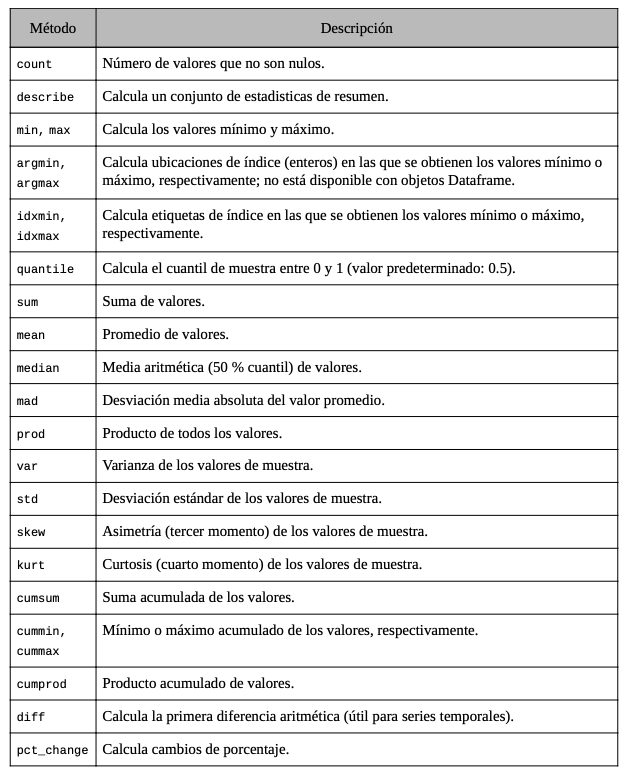

### Resumen de 5 numeros
El resumen de cinco números de un conjunto de datos consta del número más pequeño (Min), el cuartil inferior (Q1), la mediana (Q2), el cuartil superior (Q3), y el número más grande (Max), presentados en orden de menor a mayor.

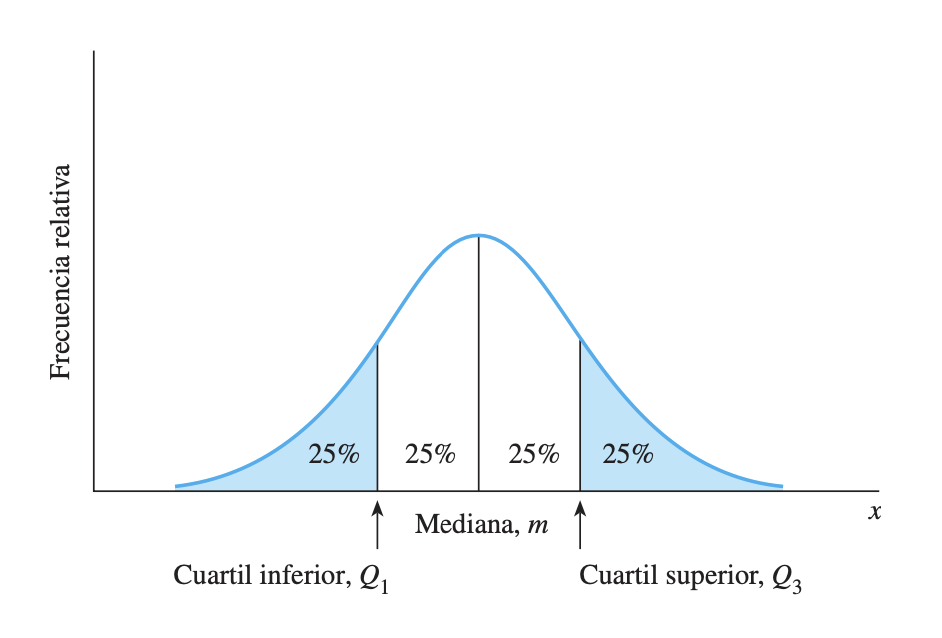

Los cuantiles son puntos que dividen un conjunto de datos ordenados en partes iguales. De modo que un cuantil indica el valor por debajo del cual se encuentra un porcentaje de datos.

Por ejemplo, si el valor del cuantil de orden 0,39 es 24, significa que el 39% de los datos de la muestra son menores que 24 y que el resto de datos son mayores que 24.

Los cuartiles, que dividen a la distribución en cuatro partes (corresponden a los cuantiles 0,25; 0,50 y 0,75);

### 2. Obtenga un resumen de 5 numeros para el ozono.

In [13]:
df['O3'].quantile([.25, .50, .75])

0.25    23.923077
0.50    29.838384
0.75    36.216012
Name: O3, dtype: float64

In [15]:
df['O3'].min()

3.2260536398467434

In [16]:
df['O3'].max()

67.44375

In [17]:
df['O3'].describe()

count    3073.000000
mean       30.486331
std         9.023384
min         3.226054
25%        23.923077
50%        29.838384
75%        36.216012
max        67.443750
Name: O3, dtype: float64

### Grafica de caja.
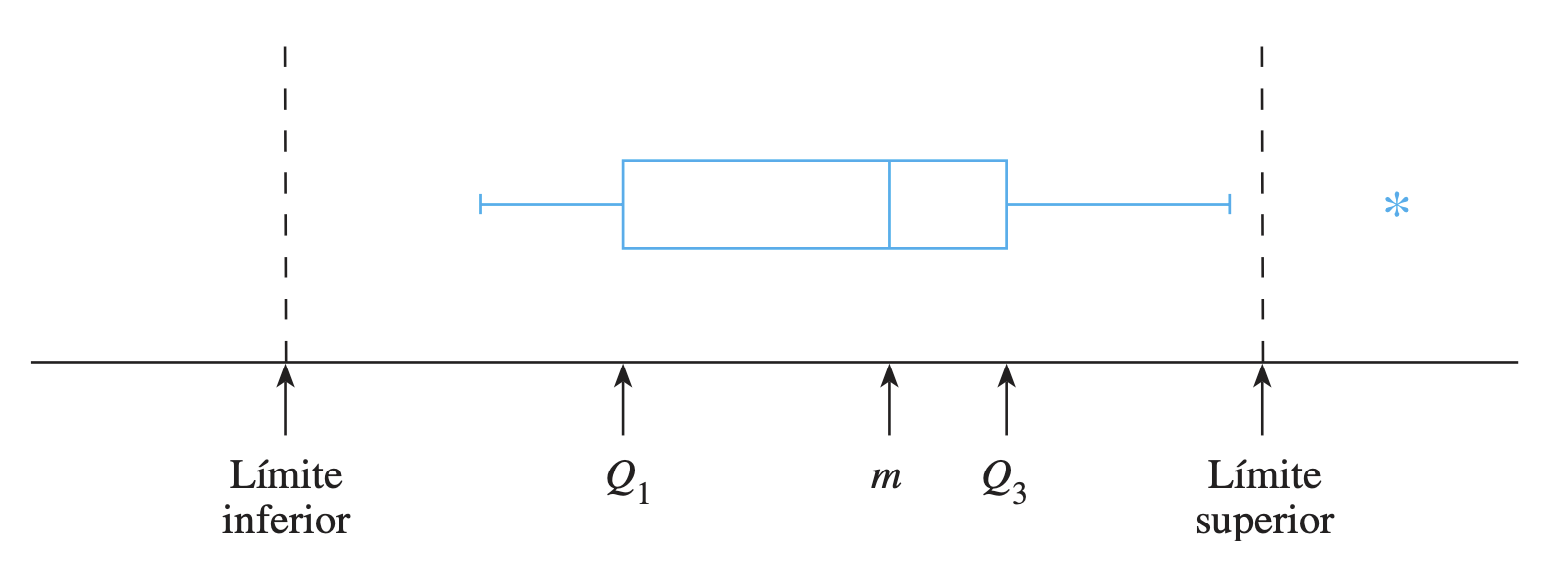

Rango intercuartil (IQR): IQR = Q3-Q1

Límite inferior: Q1 - 1.5(IQR)

Límite superior: Q3 + 1.5(IQR)

Un valor atípico (outlier) es una observación que es numéricamente distante del resto de los datos.

### 3. Obtenga una gráfica de caja para el dióxido de nitrógeno (NO2).

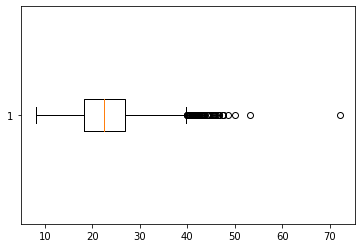

In [23]:
plt.boxplot(df['NO2'], vert= False) 
plt.show()

### 4. Obtenga las graficas de caja de las partículas PM10 y PM25.

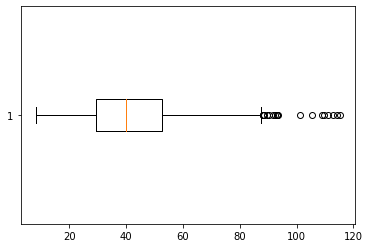

In [24]:
plt.boxplot(df['PM10'], vert= False) 
plt.show()

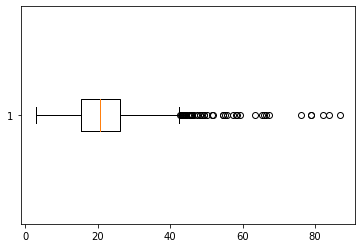

In [25]:
plt.boxplot(df['PM25'], vert= False) 
plt.show()

### 5. Obtenga las graficas de caja de todos los contaminantes.

In [29]:
import seaborn as sns


<AxesSubplot:>

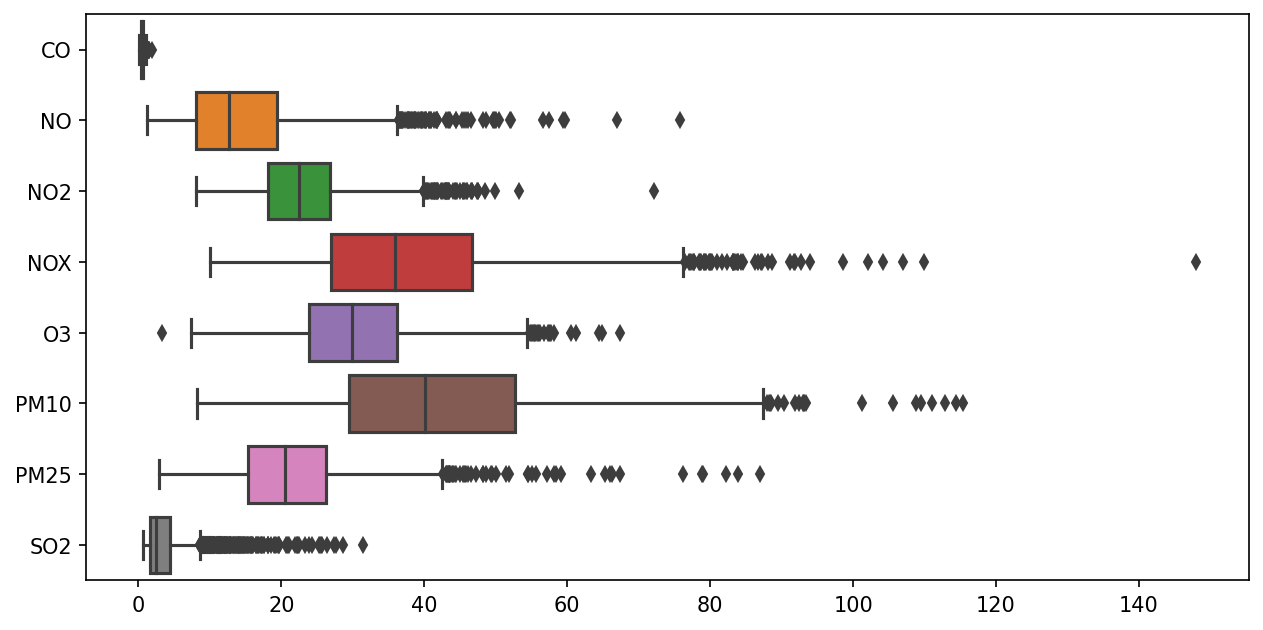

In [31]:
plt.figure(figsize=(10,5), dpi=150)
sns.boxplot(data=df, orient='h')


# orient='h'
# plt.figure(figsize=(10,5), dpi=150)

¿Cuantos datos atípicos tienen los óxidos de nitrógeno?

In [32]:
df['NOX'].describe()

count    3073.000000
mean       37.996908
std        14.795599
min         9.983402
25%        26.938073
50%        35.880223
75%        46.739777
max       148.005952
Name: NOX, dtype: float64

In [37]:
IQR = 46.739 - 26.938
Ls = 46.739 + 1.5 * IQR


In [38]:
Da= (df['NOX'] > Ls).sum()
print ('El numero de datos atipicos que tiene el oxido de nitrogeno es igual a',Da)

El numero de datos atipicos que tiene el oxido de nitrogeno es igual a 50


In [40]:
df[(df['NOX'] > Ls)] #Son los datos atipicos que se encuentran en el datafream

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
300,2015-10-28,1.372311,45.855556,37.611111,83.483333,9.061873,42.557471,30.720000,3.619247
333,2015-11-30,1.206702,40.646893,46.649718,87.296610,31.528761,73.137195,34.442857,14.675676
334,2015-12-01,1.346911,48.621687,49.959036,98.563855,32.173285,88.511278,37.972452,8.535469
335,2015-12-02,1.170023,41.613744,41.537915,83.168246,34.519856,82.251185,39.617978,10.091106
342,2015-12-09,1.225478,44.491765,40.176471,84.654118,20.076106,63.483806,39.507500,8.186047
343,2015-12-10,1.239224,40.892086,45.414868,86.292566,28.603232,82.167665,46.106700,7.530917
344,2015-12-11,1.312555,46.114486,45.605140,91.745327,27.717277,81.609562,43.553350,5.140969
349,2015-12-16,1.026555,48.171021,30.389549,78.567696,21.050000,46.800937,18.555556,2.534188
354,2015-12-21,1.213817,36.889412,44.056471,80.957647,25.956124,73.683742,40.362606,11.934426
356,2015-12-23,1.496288,59.714617,42.396752,102.088167,8.738182,71.317181,31.682451,5.814385


In [41]:
df['NOX'][(df['NOX'] > Ls)] #Son el numero de  datos atipicos que se encuentran en el datafream de NOX

300      83.483333
333      87.296610
334      98.563855
335      83.168246
342      84.654118
343      86.292566
344      91.745327
349      78.567696
354      80.957647
356     102.088167
357      93.936170
376      88.602679
380     104.143172
381      78.528822
382      77.366292
385      92.643836
389      79.222472
393     148.005952
394     106.968137
398      80.320197
410      80.032995
686      91.200743
735      80.026030
736      83.161525
741      77.578288
753      77.672055
756      79.142045
1058     83.692469
1068     79.817610
1069     82.397541
1070     77.199153
1075     83.939834
1076     77.013889
1077     88.136499
1078    109.968900
1079     83.271579
1083     78.487696
1086     78.764259
1105     91.859406
1106     79.102273
1127     81.594595
1413     83.248210
1422     77.758621
1446     80.066667
1450     86.760135
1451     87.184991
1831     76.478528
2547     79.363636
2548     84.385199
2549     83.868571
Name: NOX, dtype: float64

In [43]:
df[['fecha','NOX']][(df['NOX'] > Ls)] #Son los datos atipicos con fecha que se encuentran en el datafream de NOX

,fecha,NOX
300,2015-10-28,83.483333
333,2015-11-30,87.296610
334,2015-12-01,98.563855
335,2015-12-02,83.168246
342,2015-12-09,84.654118
343,2015-12-10,86.292566
344,2015-12-11,91.745327
349,2015-12-16,78.567696
354,2015-12-21,80.957647
356,2015-12-23,102.088167


### Gráficas de los contaminantes

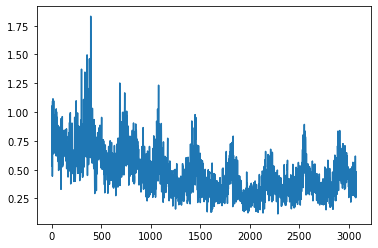

In [44]:
fig, ax = plt.subplots()
ax.plot(df['CO']);

### Serie temporal
Llamaremos serie temporal ó serie de tiempo a una colección de n datos indexados por un tiempo t , es decir, ordenados cronológicamente. La indexación t de una serie temporal debe ser en intervalos de una misma longitud, tales como anual, mensual, semanal, diaria, por hora, etc.

In [45]:
df.index

RangeIndex(start=0, stop=3073, step=1)

pd.to_datetime( ) se utiliza para convertir diferentes tipos de datos en objetos de fecha.

.index( ) se utiliza para asignar una lista, serie u otro dataframe como el índice de un dataframe.

In [46]:
df['fecha'] = pd.to_datetime(df['fecha'])

In [47]:
df=df.set_index('fecha')

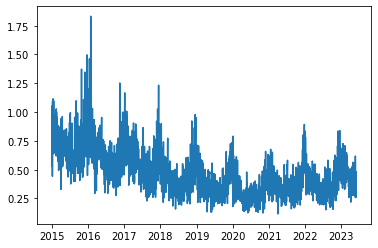

In [48]:
fig, ax = plt.subplots()
ax.plot(df['CO']);

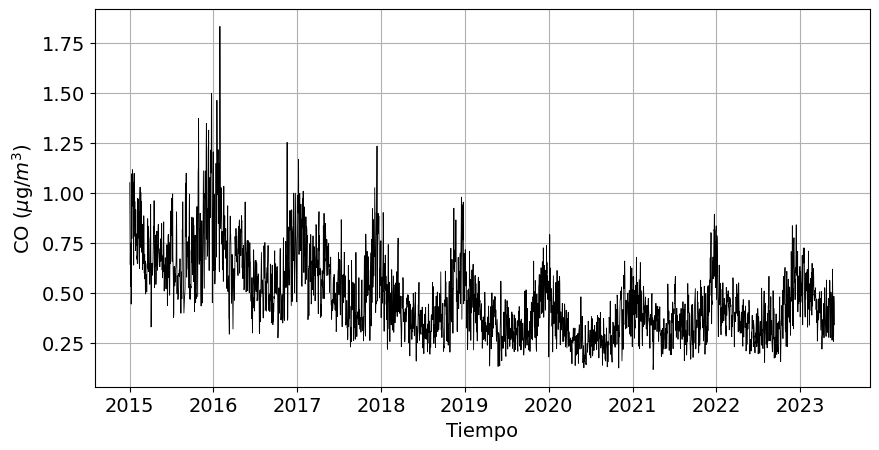

In [50]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
ax.plot(df['CO'], color='black',lw=0.6);
ax.tick_params(labelsize=14)
ax.set_xlabel('Tiempo', fontdict = {'fontsize':14 })
ax.set_ylabel('CO ($\mu$g/$m^3$)', fontdict = {'fontsize':14 });
ax.grid(True)

Realice las gráficas de 2 contaminantes

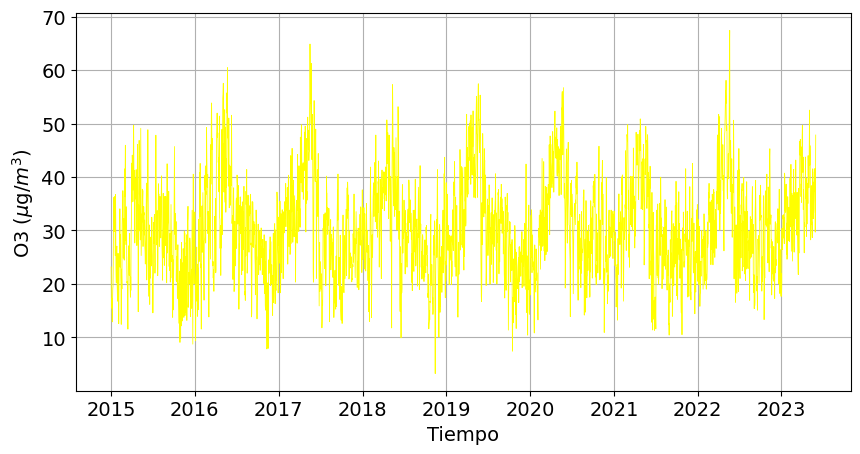

In [51]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
ax.plot(df['O3'], color='yellow',lw=0.6);
ax.tick_params(labelsize=14)
ax.set_xlabel('Tiempo', fontdict = {'fontsize':14 })
ax.set_ylabel('O3 ($\mu$g/$m^3$)', fontdict = {'fontsize':14 });
ax.grid(True)

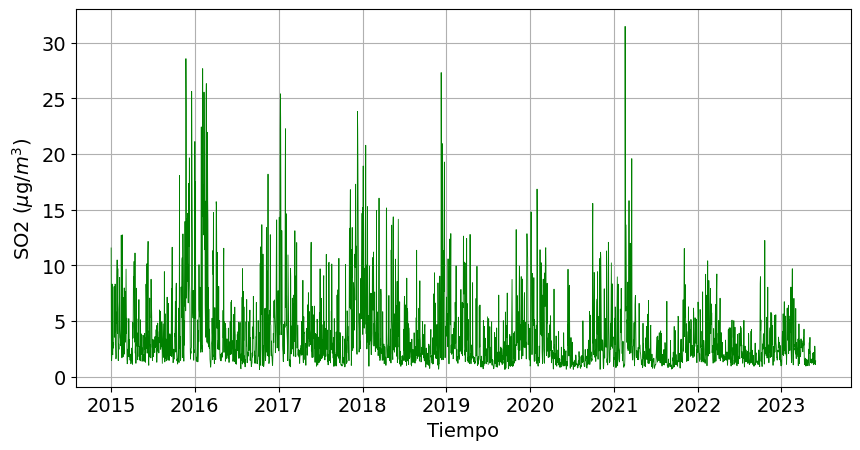

In [53]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
ax.plot(df['SO2'], color='green',lw=0.6);
ax.tick_params(labelsize=14)
ax.set_xlabel('Tiempo', fontdict = {'fontsize':14 })
ax.set_ylabel('SO2 ($\mu$g/$m^3$)', fontdict = {'fontsize':14 });
ax.grid(True)

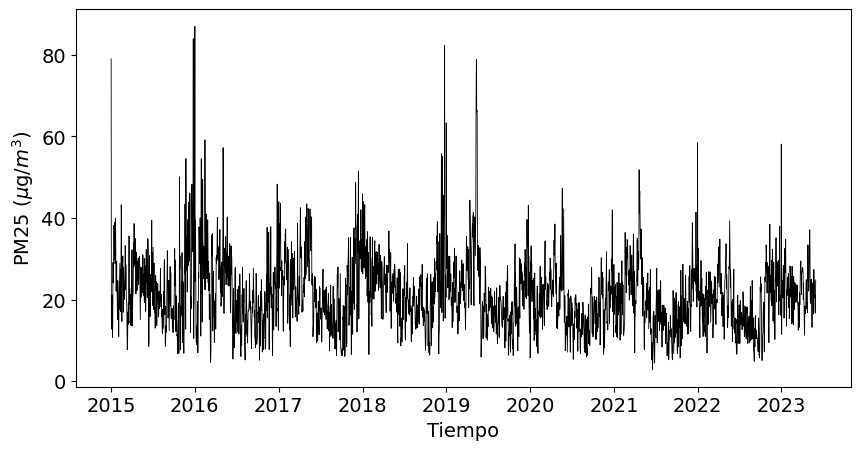

In [54]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
ax.plot(df['PM25'], color='black',lw=0.6);
ax.tick_params(labelsize=14)
ax.set_xlabel('Tiempo', fontdict = {'fontsize':14 })
ax.set_ylabel('PM25 ($\mu$g/$m^3$)', fontdict = {'fontsize':14 });

La OMS estableció un nivel recomendado de 25 Mg/m^3 (media de 24 horas) para las concentraciones de PM25
. ¿En qué dias se rebasó el nivel recomendado en 2022?

In [55]:
df['PM25']['2022-01-01':'2022-12-31'][df['PM25']>25]

fecha
2022-01-01    58.414835
2022-01-03    28.670588
2022-01-04    32.527687
2022-01-05    27.703125
2022-01-06    25.186747
                ...    
2022-12-20    29.639394
2022-12-22    27.008523
2022-12-23    25.591549
2022-12-24    26.856397
2022-12-25    37.955224
Name: PM25, Length: 75, dtype: float64

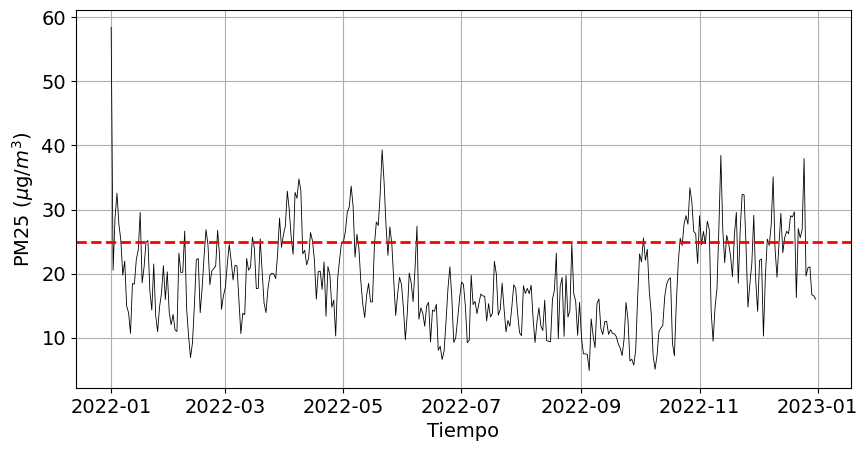

In [57]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
ax.plot(df['PM25']['2022-01-01':'2022-12-31'], color='black',lw=0.6);
ax.tick_params(labelsize=14)
ax.set_xlabel('Tiempo', fontdict = {'fontsize':14 })
ax.set_ylabel('PM25 ($\mu$g/$m^3$)', fontdict = {'fontsize':14 });
ax.axhline(25,color='red',lw=2,linestyle='--')
plt.grid(True)
plt.show()

### Coeficiente de asimetría de Fisher
El coeficiente de asimetría de Fisher es un coeficiente que permite calcular la asimetría de una distribución. Es decir, el coeficiente de asimetría sirve para determinar si una función es asimétrica positiva, asimétrica negativa o simétrica. Dada una muestra {X1,X2,....Xn}, la fórmula del coeficiente de asimetría de Fisher es: 
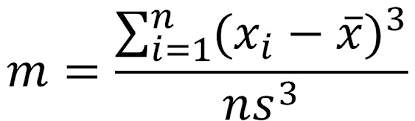

Donde, x y s son la media y desviación estandar muestrales.

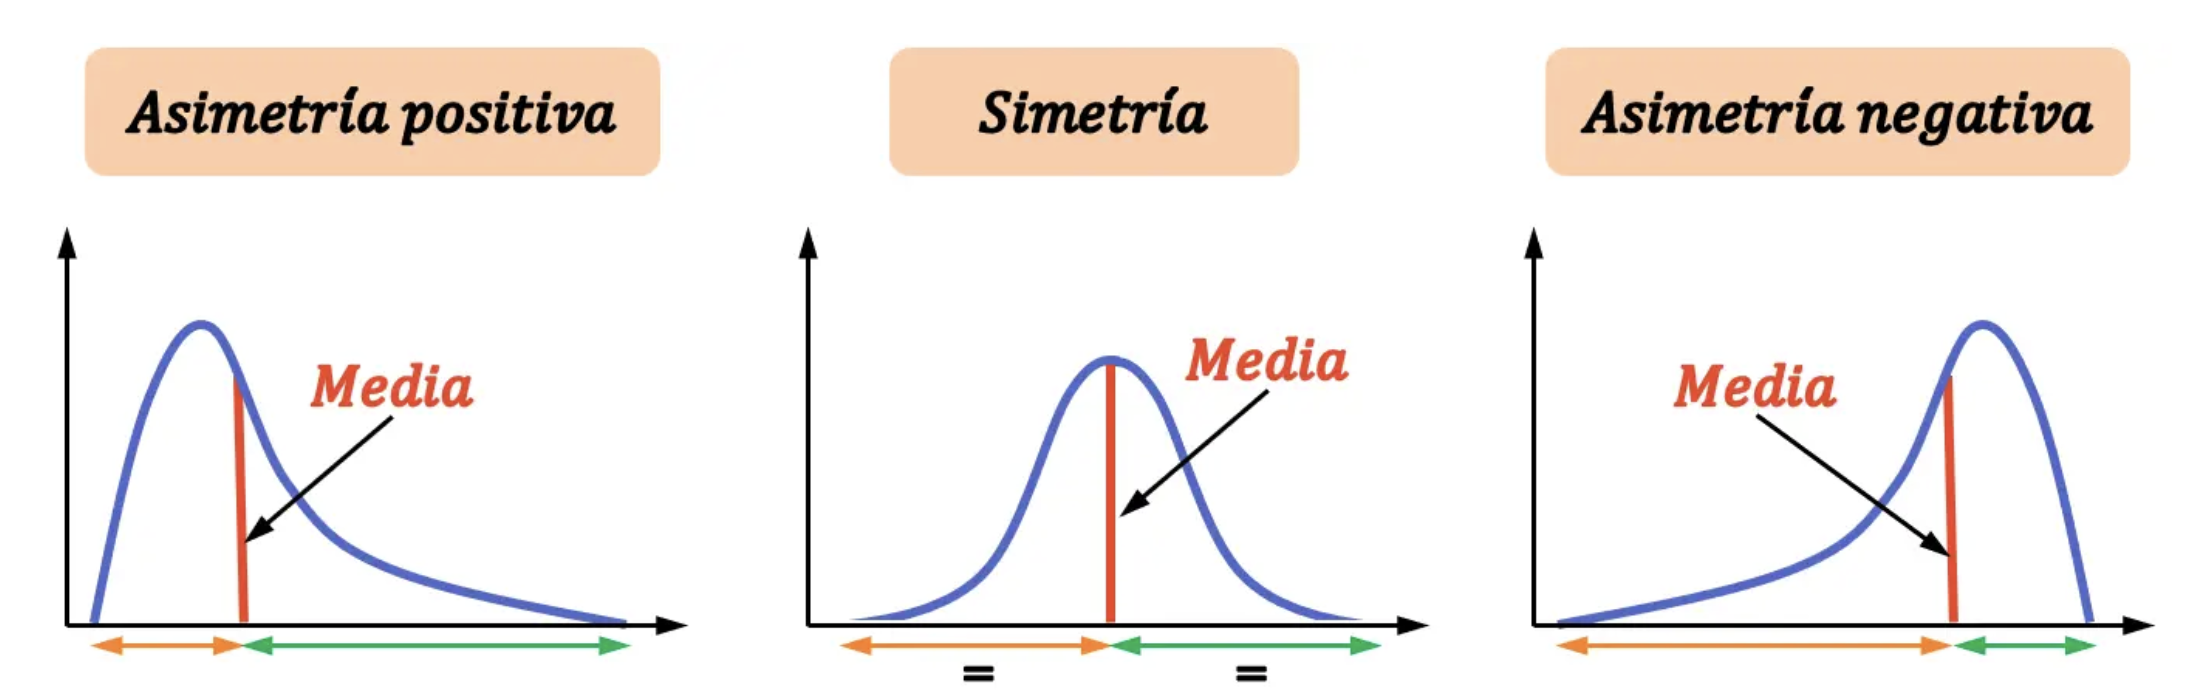

Si y1 > 0, la distribución es asimétrica positiva.

Si y1 < 0, la distribución es asimétrica negativa.



In [58]:
df.skew()

CO      1.063310
NO      1.265967
NO2     0.773803
NOX     0.977845
O3      0.374217
PM10    0.559250
PM25    1.302965
SO2     2.802113
dtype: float64

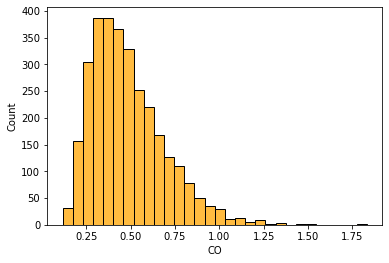

In [59]:
sns.histplot(df['CO'], bins=30, color='orange')
plt.show()

La curtosis (Kurtosis) define en qué grado las colas de la distribución difieren de las colas de una distribución normal. Dada una muestra {X1,X2,...Xn}, el coeficiente de curtosis se define como:
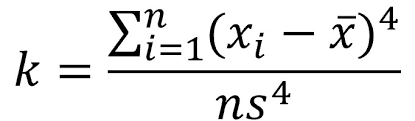

Donde x y s son la media y desviación estandar muestrales.

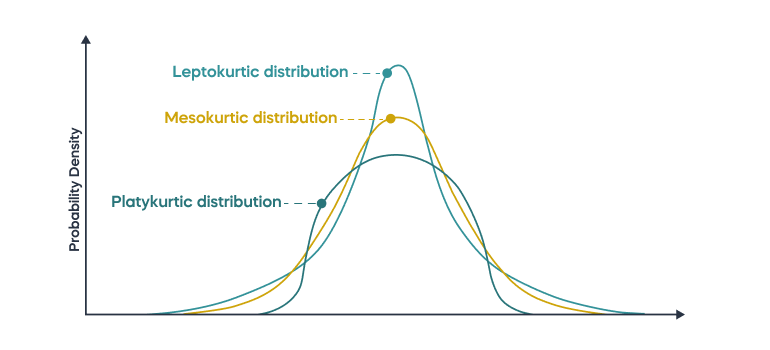

Si k > 0, la distribución es leptocúrtica (distribución con colas más largas que la normal).

Si k = 0, la distribución es mesocúrtica (cuando tiene una distribución normal o su misma curtosis).

Si k < 0, la distribución es platicúrtica (distribución con colas menos largas que la normal.).

In [60]:
df.kurt()

CO       1.683262
NO       2.462188
NO2      1.428723
NOX      1.776258
O3       0.038129
PM10     0.314006
PM25     5.184911
SO2     10.735611
dtype: float64